## Visualize training of static VAE on circle/Gaussian data

- Input: circles on Gaussian-blob background (32x32)
- Number of latents: 10

- batch size: 64

- 1M training batches
- RMSprop w lr = 1e-05


In [1]:
import torch
import pickle
from models import staticVAE32

import matplotlib.pyplot as plt
import numpy as np

In [4]:
vae = staticVAE32(n_latent = 10)
checkpoint = torch.load('trained/staticvae32_10latents_dsprites_circle_last_1M')
vae.load_state_dict(checkpoint['model_states']['net'])

training_stats = pickle.load(open('trained/staticvae32_10latents_dsprites_circle_1M.pkl', 'rb'))

#### plot training loss



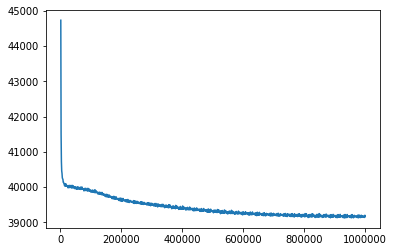

In [5]:
plt.plot(training_stats['iter'], training_stats['recon_loss'])

apparent difference in noise because logging interval was changed at 100K

possibly problems with the optimizer (too high of a learning rate)

### load some data and plot reconstructions


In [6]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from data.dspritesb import dSpriteBackgroundDataset, Rescale

ds = dSpriteBackgroundDataset(transform=Rescale(32),shapetype = 'circle')


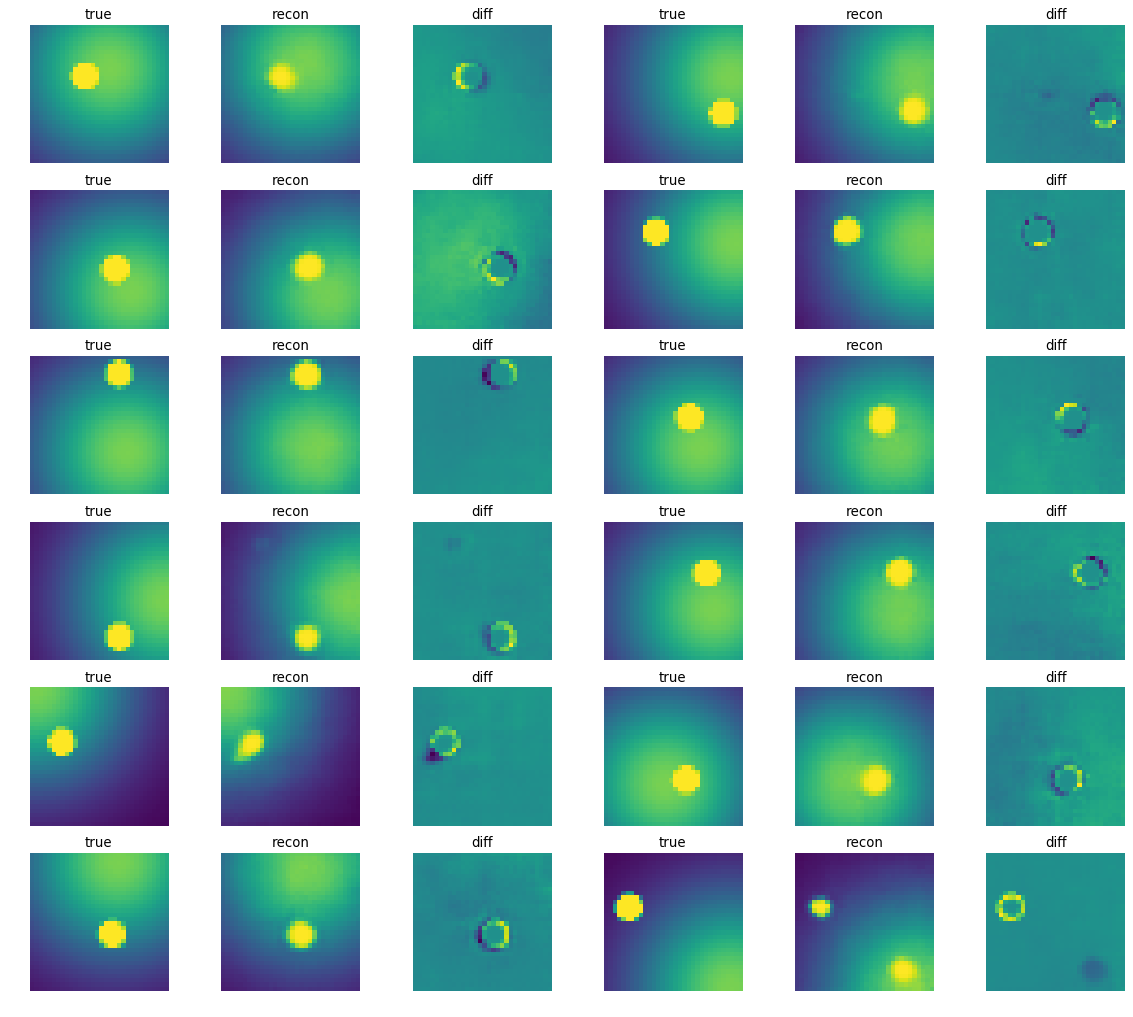

In [7]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
cnt = 0
for ii in range(12):
    x = ds.__getitem__(np.random.randint(1000))
    x = x['image']
    
    recon, mu, logvar = vae(torch.tensor(x[np.newaxis, np.newaxis,:, :]).float())
    recon = recon.detach().numpy().squeeze()
    
    diff = x - recon
    
    cnt += 1
    ax = plt.subplot(6,6,cnt)
    ax.imshow(x, vmin=0, vmax=1)
    plt.title('true')
    plt.axis('off')
    
    cnt += 1
    ax = plt.subplot(6,6,cnt)    
    ax.imshow(recon, vmin=0, vmax=1)
    plt.title('recon')
    plt.axis('off')
    
    cnt += 1
    ax = plt.subplot(6,6,cnt)    
    m = np.max(np.abs(diff))
    ax.imshow(diff, vmin=-m, vmax=m)
    plt.title('diff')
    plt.axis('off')    

### Visualize entanglement/disentanglement

Each row is a sweep from -2 to 2 in one dimension while fixing the others at 0.

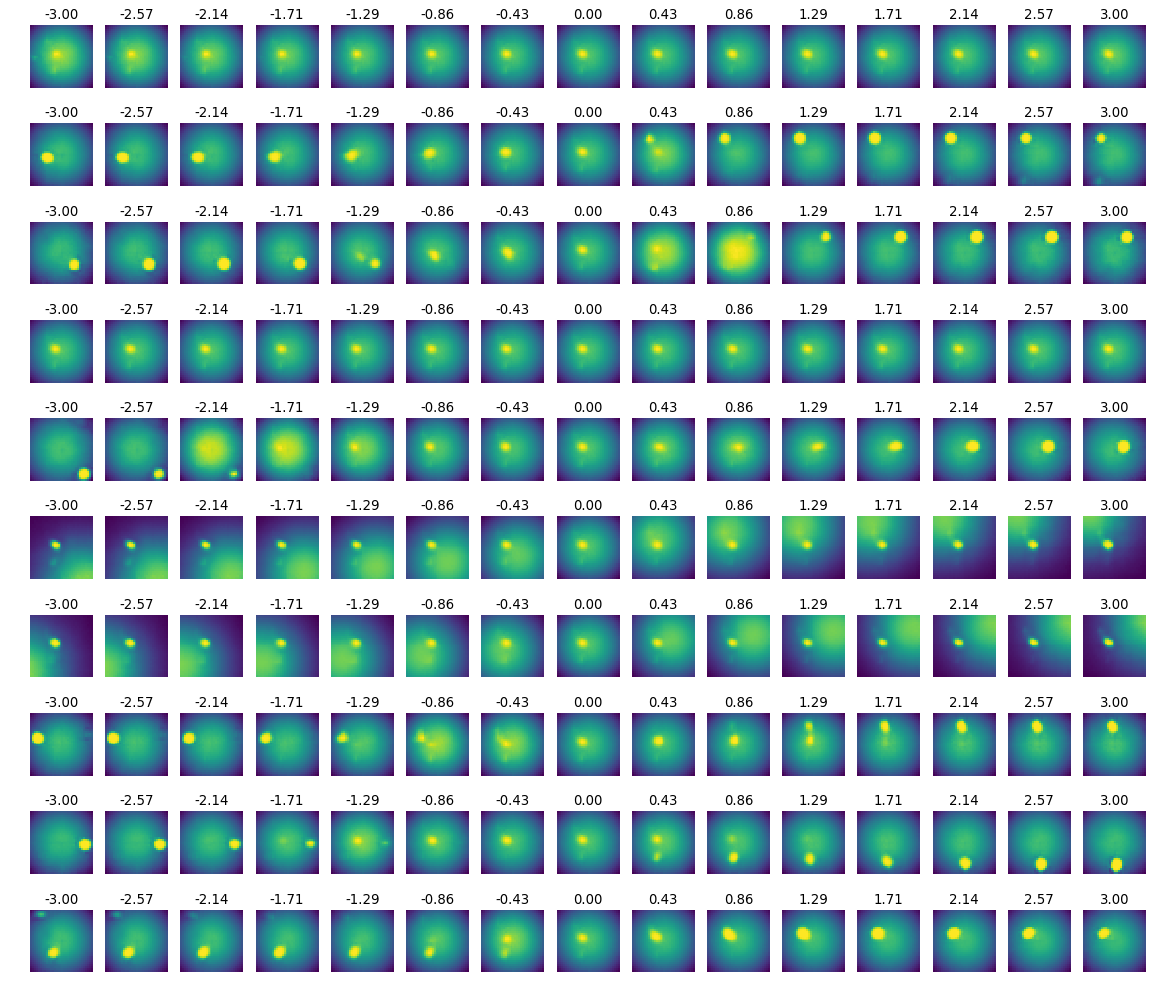

In [8]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
z_points = np.linspace(-3,3, 15)
len(z_points)
for ii in range(10):
    for jj in range(len(z_points)):
        latent = torch.zeros(1,10)
        latent[0,ii] = z_points[jj]
        
        rec = vae.decode(latent)
        ax = plt.subplot(10,len(z_points),ii*len(z_points) + jj + 1)
        ax.imshow(rec.detach().numpy().squeeze())
        plt.title('%0.2f' % z_points[jj])
        plt.axis('off')